## Modeling

---

### Objective: 

This notebook will seek to build a classification model to predict the tumor diagnosis.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # only for multiclass problems

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/anaconda3/envs/dsi/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda3/envs/dsi/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/anaconda3/envs/dsi/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/surajsakaram/.keras/keras.json' mode='r' encoding='utf-8'>
  _config = json.load(open(_config_path))


## Load dataset

In [86]:
directory = '/Users/surajsakaram/GA_DSI/capstone/'
os.chdir(directory)

In [87]:
# Load dataset
df = pd.read_csv('./data/expression.csv')
df.head()

,Unnamed: 0,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Project ID
0,dc8d96ef-81eb-41c8-a486-02d107c1a137,3.547968,3.549818,3.546214,4.117714,3.007233,2.581141,2.785192,3.017134,2.992315,...,0.545588,0.000000,0.427299,0.545588,0.0,1.832469,1.640566,2.339908,4.439245,TCGA-BRCA
1,93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b,3.768018,3.761313,3.768977,4.516109,3.376693,2.356177,2.598639,2.974029,2.968223,...,0.445166,0.000000,0.700805,0.803563,0.0,1.559870,1.376333,2.847180,4.302784,TCGA-BRCA
2,6d869125-0f2b-406a-a1aa-4b352b2247d3,4.104185,4.108015,4.111399,3.937836,2.703592,3.204237,3.688180,4.085192,4.091688,...,0.637865,0.325225,1.190040,0.637865,0.0,1.963026,2.138418,2.055275,4.640409,TCGA-LUAD
3,41dbd6ab-871d-4ee4-be13-392b4995f6ce,3.935165,3.927110,3.946023,4.527177,3.188055,2.909463,3.352680,2.911188,2.892728,...,0.626380,0.000000,0.417504,0.417504,0.0,1.679797,1.708174,2.687683,5.125350,TCGA-BRCA
4,322badf4-b70d-4f90-ac44-d2f30e52f03c,4.013612,4.002393,4.008206,4.389196,3.509239,2.801726,3.011989,3.539071,3.544329,...,0.423645,0.150176,0.150176,0.261553,0.0,0.150176,1.824024,2.847896,4.510322,TCGA-KIRC


In [88]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = ''
df.head(3)

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Project ID
,,,,,,,,,,,,,,,,,,,,,
dc8d96ef-81eb-41c8-a486-02d107c1a137,3.547968,3.549818,3.546214,4.117714,3.007233,2.581141,2.785192,3.017134,2.992315,2.457217,...,0.545588,0.000000,0.427299,0.545588,0.0,1.832469,1.640566,2.339908,4.439245,TCGA-BRCA
93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b,3.768018,3.761313,3.768977,4.516109,3.376693,2.356177,2.598639,2.974029,2.968223,2.258890,...,0.445166,0.000000,0.700805,0.803563,0.0,1.559870,1.376333,2.847180,4.302784,TCGA-BRCA
6d869125-0f2b-406a-a1aa-4b352b2247d3,4.104185,4.108015,4.111399,3.937836,2.703592,3.204237,3.688180,4.085192,4.091688,3.328237,...,0.637865,0.325225,1.190040,0.637865,0.0,1.963026,2.138418,2.055275,4.640409,TCGA-LUAD


## Convert Label to Numerical Classes

In [89]:
# Store the uniques tumor classes 
labels = df['Project ID'].unique()
labels

array(['TCGA-BRCA', 'TCGA-LUAD', 'TCGA-KIRC', 'TCGA-UCEC', 'TCGA-HNSC',
       'TCGA-LGG'], dtype=object)

In [90]:
# Create a dictionary and assign a numerical value to each class
label_dict = {}
for i, val in enumerate(labels):
    label_dict[val] = i

label_dict

{'TCGA-BRCA': 0,
 'TCGA-LUAD': 1,
 'TCGA-KIRC': 2,
 'TCGA-UCEC': 3,
 'TCGA-HNSC': 4,
 'TCGA-LGG': 5}

In [91]:
# Map the dictionary onto the Project ID column
df['Project ID'] = df['Project ID'].apply(lambda x: label_dict[x])

In [92]:
df['Project ID'].head()


dc8d96ef-81eb-41c8-a486-02d107c1a137    0
93b8bab9-acd8-4a5a-b4ba-ec52b2ab186b    0
6d869125-0f2b-406a-a1aa-4b352b2247d3    1
41dbd6ab-871d-4ee4-be13-392b4995f6ce    0
322badf4-b70d-4f90-ac44-d2f30e52f03c    2
Name: Project ID, dtype: int64

In [93]:
df['Project ID'].values

array([0, 0, 1, ..., 2, 5, 3])

In [94]:
np.unique(df['Project ID'].values, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1207,  567,  616,  579,  569,  530]))

In [12]:
df.corr()['Project ID'][df.corr()['Project ID'] > 0.8]

Project ID    1.0
Name: Project ID, dtype: float64

- This ensures that there are no miRNA features that are highly correlated with the Project ID column suggesting there is no data leakage.

## Modeling

Several different classification models will be trained including a Multinomial Logistic Regression, Random Forest, ExtraTrees, and Neural Net. Principal Components Analysis will be done to assess the overall variance contributed by each miRNA variable in this high dimensional dataset.

In [154]:
# define X and y
features = [col for col in df.columns if col != 'Project ID']
X = df[features]
y = df['Project ID']

X.shape, y.shape

((4068, 1881), (4068,))

In [15]:
# Create Train/Test Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
# Scale X and transform 
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression

In [20]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
lr_train = lr.score(X_train_sc, y_train)
lr_xval = cross_val_score(lr, X_train_sc, y_train, cv=5).mean()
lr_test = lr.score(X_test_sc, y_test)

print(f'Logistic Regression Train score:     {round(lr_train, 4)}')
print(f'Logistic Regression Cross Val score: {round(lr_xval, 4)}')
print(f'Logistic Regression Test score:      {round(lr_test, 4)}')

Logistic Regression Train score:     1.0
Logistic Regression Cross Val score: 0.9928
Logistic Regression Test score:      0.9902


In [24]:
# Make predictions 
lr_preds = lr.predict(X_test_sc)

In [25]:
confusion_matrix(y_test, lr_preds)

array([[290,   1,   0,   1,   2,   0],
       [  1, 128,   0,   0,   0,   0],
       [  0,   1, 145,   0,   0,   0],
       [  0,   1,   1, 157,   1,   0],
       [  0,   1,   0,   0, 141,   0],
       [  0,   0,   0,   0,   0, 146]])

- The logistic regression model has a training accuracy score of 100% which is unusually accurate. 
- The cross validation score of 99.28% suggests that the estimated accuracy is on par with the training set score. 
- The model performs with an accuracy of 99.02% on the test set. 
- The confusion matrix depicts that the model has accurately classified the samples to their appropriate tumor diagnoses with very few samples being misclassified. 

In [97]:
# Access the coefficients of the logistic regression model 
lr.coef_

array([[ 0.03151776,  0.03092023,  0.03197863, ..., -0.01049186,
         0.07603127,  0.02183182],
       [-0.00503442, -0.00416336, -0.00496425, ...,  0.04825268,
        -0.11475346,  0.00358576],
       [-0.01462169, -0.01453553, -0.0143295 , ...,  0.02885858,
        -0.02875857,  0.02481684],
       [-0.02159093, -0.02168356, -0.02206536, ..., -0.05970354,
         0.01753393,  0.04982261],
       [ 0.01469039,  0.01435554,  0.01432473, ..., -0.01896655,
         0.01749104, -0.09396333],
       [-0.00496111, -0.00489332, -0.00494425, ...,  0.0120507 ,
         0.03245578, -0.00609371]])

- These coefficients will be useful in understanding which miRNAs seemed to have the greatest predictive power in classifying the samples to their respective cancer types.
- However, first we need to sort them to be able to pick out the top 10 most influential. 

In [100]:
# Create a mask that stores the column index of the top 10 most influential miRNAs
masks = []
for i in range(len(lr.coef_)):
    masks.append(np.argsort(lr.coef_[i])[:-11:-1])

In [120]:
# Store the top 10 miRNAs into a dictionary 
top10dict = {}

for i, label in enumerate(list(labels)):
    top10dict[label] = list(df.iloc[:, masks[i]].columns)

In [124]:
# Convert the top 10 dictionary into a dataframe
top10df = pd.DataFrame(top10dict)
top10df

,TCGA-BRCA,TCGA-LUAD,TCGA-KIRC,TCGA-UCEC,TCGA-HNSC,TCGA-LGG
0,hsa-mir-5683,hsa-mir-552,hsa-mir-122,hsa-mir-196b,hsa-mir-944,hsa-mir-219a-2
1,hsa-mir-190b,hsa-mir-3617,hsa-mir-204,hsa-mir-676,hsa-mir-206,hsa-mir-488
2,hsa-mir-7156,hsa-mir-511,hsa-mir-30c-2,hsa-mir-5680,hsa-mir-6499,hsa-mir-92b
3,hsa-mir-193a,hsa-mir-4709,hsa-mir-30a,hsa-mir-10b,hsa-mir-205,hsa-mir-9-3
4,hsa-mir-196a-1,hsa-mir-5698,hsa-mir-653,hsa-mir-135b,hsa-mir-6512,hsa-mir-9-2
5,hsa-mir-196a-2,hsa-mir-100,hsa-mir-192,hsa-mir-532,hsa-mir-1293,hsa-mir-9-1
6,hsa-mir-548ao,hsa-mir-375,hsa-mir-615,hsa-mir-3131,hsa-mir-203a,hsa-mir-219a-1
7,hsa-mir-6510,hsa-mir-147b,hsa-mir-30c-1,hsa-mir-130a,hsa-mir-6510,hsa-mir-153-1
8,hsa-mir-4501,hsa-mir-548b,hsa-mir-190a,hsa-mir-3921,hsa-mir-31,hsa-mir-346
9,hsa-let-7b,hsa-mir-181b-2,hsa-mir-194-2,hsa-mir-135a-1,hsa-mir-4491,hsa-mir-124-1


- This table shows the top 10 miRNAs that influence the predictive capabilities of the classifier.
- It is evident that these miRNAs are unique to the cancer type with no overlapping miRNAs.
- Few notable miRNAs among that many displayed:
    - [hsa-mir-190b has been shown to characterize the luminal-A/B breast cancer subtypes with a high level of expression.][1]
    - [hsa-mir-552 has been shown to be expressed at high levels in Primary Lung Adenocarcinoma.][2]
    - [hsa-mir-122 has been shown to promotes proliferation and invasion of clear cell renal cell carcinoma.][3]

[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043070/
[2]: http://ar.iiarjournals.org/content/34/5/2297.full.pdf
[3]: https://www.ncbi.nlm.nih.gov/pubmed/30483771

### Random Forest 

In [29]:
rf = RandomForestClassifier()
rf_params =  {
        'n_estimators' : [20, 60, 100],
        'max_depth' : [None, 2, 6, 10],
        'min_samples_split' : [2, 3, 4] 
}

gs_rf = GridSearchCVProgressBar(rf, param_grid = rf_params)
gs_rf.fit(X_train_sc, y_train)
print(f'Random Forest:')
print(f'Train Score: {gs_rf.best_score_}')
print(f'Test Score: {gs_rf.score(X_test_sc, y_test)}')

[........................................] 100% | 109.45 sec | GridSearchCV 
Random Forest:
Train Score: 0.9872173058013766
Test Score: 0.9872173058013766


In [170]:
cross_val_score(gs_rf.best_estimator_, X_train_sc, y_train, cv=5).mean()

0.9845959113918971

In [155]:
# Access the feature importances of the best estimator
rf_feature_importances = gs_rf.best_estimator_.feature_importances_

In [166]:
# View feature importances alongside miRNA as these should map directly onto the feature list
rf_features = pd.DataFrame(list(zip(features, rf_feature_importances)), columns=['miRNA', 'importance'])
rf_features.sort_values(by='importance', ascending=False).head()

,miRNA,importance
276,hsa-mir-205,0.020093
26,hsa-mir-10b,0.019464
256,hsa-mir-196b,0.016212
595,hsa-mir-375,0.016058
328,hsa-mir-27b,0.015958


In [169]:
# Number of features that have a non-zero importance value
rf_features[rf_features['importance'] != 0].shape[0] 

1270

In [33]:
# Make predictions using the best estimator
rf_preds = gs_rf.best_estimator_.predict(X_test_sc)

In [34]:
confusion_matrix(y_test, rf_preds)

array([[289,   1,   0,   2,   2,   0],
       [  0, 127,   0,   2,   0,   0],
       [  2,   0, 144,   0,   0,   0],
       [  2,   0,   1, 157,   0,   0],
       [  1,   0,   0,   0, 141,   0],
       [  0,   0,   0,   0,   0, 146]])

- It appears that 611 miRNAs do not have an importance value associated with it, leaving 1270 miRNAs that play a role in the classification of cancer types. The miRNA with the highest feature importance is hsa-mir-205. 
- We are limited in obtaining a list of miRNAs that serve as a signature of a specific cancer type. 
- The confusion matrix again shows that a Random forest model results in a very high accuracy rate of 98.7% on both training and test datasets.

### ExtraTrees 

In [35]:
et = ExtraTreesClassifier()
et_params = {
        'n_estimators' : [20, 60, 100],
        'max_depth' : [None, 6, 10, 14],
        'min_samples_leaf' : [1, 2], 
        'min_samples_split' : [2, 3], 
}
gs_et = GridSearchCVProgressBar(et, param_grid = et_params)
gs_et.fit(X_train_sc, y_train)
print(f'Extra-Trees:')
print(f'Train Score: {gs_et.best_score_}')
print(f'Test Score: {gs_et.score(X_test_sc, y_test)}')

[........................................] 100% | 117.15 sec | GridSearchCV 
Extra-Trees:
Train Score: 0.984267453294002
Test Score: 0.9803343166175025


In [36]:
# Access the feature importances of the best estimator
et_feature_importances = gs_et.best_estimator_.feature_importances_
et_feature_importances

array([0.00026617, 0.00036308, 0.00022675, ..., 0.00027059, 0.00126676,
       0.00121903])

In [171]:
# View feature importances alongside miRNA as these should map directly onto the feature list
et_features = pd.DataFrame(list(zip(features, et_feature_importances)), columns=['miRNA', 'importance'])
et_features.sort_values(by='importance', ascending=False).head()

,miRNA,importance
271,hsa-mir-200c,0.016108
1874,hsa-mir-944,0.015124
303,hsa-mir-219a-2,0.015099
276,hsa-mir-205,0.015025
187,hsa-mir-141,0.013349


In [172]:
# Number of features that have a non-zero importance value
et_features[et_features['importance'] != 0].shape[0] 

1570

In [39]:
# Make predictions using the best estimator
et_preds = gs_et.best_estimator_.predict(X_test_sc)

In [40]:
confusion_matrix(y_test, et_preds)

array([[292,   1,   0,   0,   1,   0],
       [  3, 125,   0,   1,   0,   0],
       [  2,   0, 144,   0,   0,   0],
       [  7,   1,   1, 151,   0,   0],
       [  2,   1,   0,   0, 139,   0],
       [  0,   0,   0,   0,   0, 146]])

- Compared to the Random Forest Model, the ExtraTrees model doesn't assign an importance value to 311 miRNAs, leaving 1570 miRNAs that play a role in the classification of cancer types. The miRNA with the highest feature importance is hsa-mir-200c. 
- The confusion matrix shows that the ExtraTrees model has a very high accuracy rate of 98% on both training and test datasets. However, this model does have more misclassifications than the Logistic Regression or Random Forest. For example, 7 samples that otherwise have the cancer class of UCEC seem to be classified by the model as BRCA. It is likely that the expression profiles of these 7 samples match those of BRCA samples, thus further investigation into those samples would be required. 

### Principal Components Analysis

In [147]:
# Instantiate PCA
pca = PCA()

# Fit PCA
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [148]:
# Create Z_train.
Z_train = pca.transform(X_train_sc)

In [149]:
# Create Z_test.
Z_test = pca.transform(X_test_sc)

In [151]:
# Examine explained variance.
var_exp = pca.explained_variance_ratio_
print('Explained variance:\n', var_exp)

Explained variance:
 [6.08205450e-02 4.60209634e-02 2.65515483e-02 ... 8.94087017e-35
 8.70563035e-35 4.75904312e-35]


In [175]:
# Examine cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp[:100])

Cumulative explained variance:  [0.06082055 0.10684151 0.13339306 0.15165476 0.16794821 0.18357977
 0.19691453 0.20682724 0.21558956 0.22373002 0.23051356 0.23698369
 0.24256694 0.24766834 0.2525265  0.25719778 0.26170685 0.26578552
 0.26961252 0.27334966 0.27703396 0.28034325 0.28362368 0.28681288
 0.28988992 0.2928914  0.29587088 0.29882215 0.30163347 0.30438802
 0.30707919 0.30970044 0.31223989 0.31473188 0.3171429  0.31953414
 0.32184449 0.32411355 0.32635023 0.32853263 0.33066555 0.33278961
 0.33487893 0.33693165 0.33896409 0.34096039 0.34292904 0.34488955
 0.34681545 0.3487198  0.35062194 0.35249695 0.35435394 0.35620198
 0.35803492 0.35985365 0.36165218 0.36343262 0.36520671 0.36695143
 0.36868582 0.37041415 0.37213681 0.37385481 0.3755591  0.37724917
 0.37892546 0.38059455 0.38225187 0.38390334 0.38553568 0.38716382
 0.38878366 0.39039337 0.39198666 0.39357434 0.39514535 0.39670477
 0.39825539 0.39980479 0.40134672 0.4028813  0.40440585 0.40591868
 0.40741852 0.40891706 0.41040

In [176]:
# Fit PCA with original X train 
pca_2 = PCA(n_components=100)

# Fit PCA
pca_2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [177]:
# Create Z_train.
Z_train_2 = pca_2.transform(X_train)

In [178]:
Z_test_2 = pca_2.transform(X_test)

In [179]:
# Examine explained variance.
var_exp_2 = pca_2.explained_variance_ratio_
print('Explained variance:\n', var_exp_2)

Explained variance:
 [0.24183595 0.10815358 0.06985105 0.05172422 0.0457887  0.02807289
 0.0246719  0.01603969 0.01468085 0.013668   0.01259632 0.01192614
 0.01035542 0.00995229 0.00921506 0.00905691 0.00832493 0.00757009
 0.00723972 0.00660034 0.00634904 0.00600157 0.00545492 0.00531338
 0.0048543  0.00467888 0.00449047 0.00437165 0.00422352 0.00414671
 0.00407393 0.00367232 0.00354591 0.0034728  0.00335124 0.00328732
 0.00318492 0.00307394 0.00295631 0.00285982 0.00270808 0.00265059
 0.00258366 0.00252935 0.00234163 0.00224506 0.00217232 0.00212714
 0.00211492 0.0020397  0.00199543 0.00192221 0.00190672 0.0018468
 0.00178092 0.0017541  0.0017054  0.00169577 0.00160188 0.00158989
 0.00154933 0.00153101 0.00147981 0.00144581 0.00142867 0.00141163
 0.00137081 0.0013457  0.00133306 0.00132492 0.00128891 0.00125893
 0.00124668 0.00122518 0.00118237 0.00115558 0.00114033 0.0011262
 0.00110647 0.00108958 0.00106645 0.00105197 0.0010419  0.00103679
 0.00100341 0.00099535 0.00098121 0.0009680

In [180]:
# Examine cumulative explained variance.
cum_var_exp_2 = np.cumsum(var_exp_2)
print('Cumulative explained variance: ', cum_var_exp_2)

Cumulative explained variance:  [0.24183595 0.34998954 0.41984059 0.47156481 0.51735352 0.5454264
 0.5700983  0.58613799 0.60081884 0.61448684 0.62708316 0.63900931
 0.64936473 0.65931702 0.66853208 0.67758899 0.68591392 0.69348401
 0.70072372 0.70732407 0.71367311 0.71967469 0.72512961 0.73044298
 0.73529728 0.73997616 0.74446663 0.74883828 0.7530618  0.75720851
 0.76128245 0.76495476 0.76850068 0.77197347 0.77532471 0.77861202
 0.78179694 0.78487088 0.78782719 0.79068701 0.79339508 0.79604567
 0.79862933 0.80115868 0.80350031 0.80574537 0.80791769 0.81004483
 0.81215976 0.81419945 0.81619488 0.81811709 0.82002381 0.82187061
 0.82365154 0.82540563 0.82711104 0.8288068  0.83040869 0.83199858
 0.83354792 0.83507892 0.83655873 0.83800455 0.83943322 0.84084485
 0.84221567 0.84356137 0.84489443 0.84621935 0.84750826 0.84876719
 0.85001387 0.85123905 0.85242142 0.853577   0.85471733 0.85584353
 0.85695    0.85803958 0.85910603 0.860158   0.8611999  0.86223669
 0.8632401  0.86423544 0.865216

- The PCA analyses of the original training and scaled training set differ greatly with respect to how much variance is explained in the constituent components. 
- When looking at the variance explained by 100 Principal components, for the scaled data, only 42% of the variance is explained as opposed to 87% for the unscaled data. This may be due to the fact that scaling the training data is removing a substantial amount of overall variance such that each principal component explains a lesser amount of variance overall.

#### Plot the Component vs Variance explained

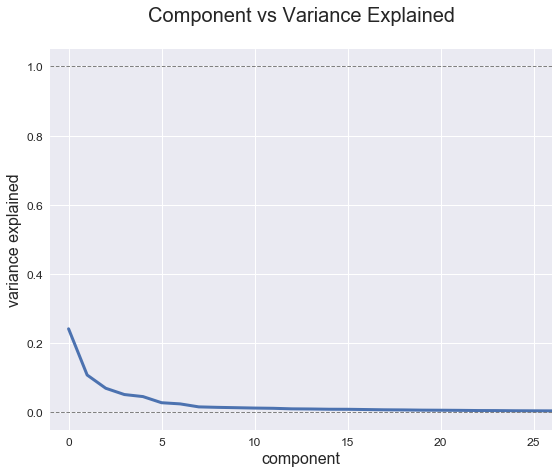

In [181]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the explained variance
component_number = range(len(var_exp_2))
plt.plot(component_number, var_exp_2, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

#### Plot the Component vs Cumulative Variance Explained

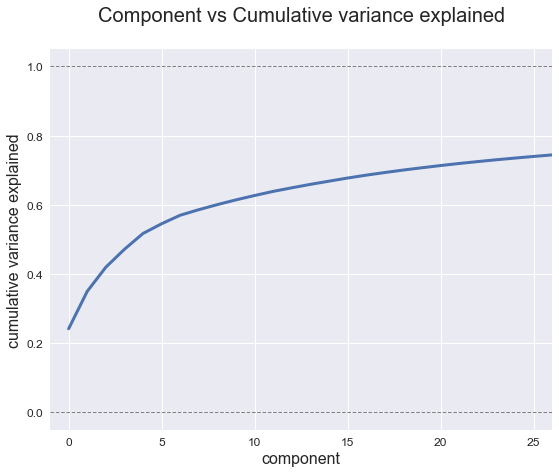

In [182]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp_2))
plt.plot(component_number, cum_var_exp_2, lw=3)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

### Neural Network 

- In order to build a Neural Net, the target variable has to be one hot encoded. 

In [183]:
# One hot encode y target
Y_train = to_categorical(y_train, 6)
Y_test = to_categorical(y_test, 6)

In [184]:
# Take a look at how the Y target looks
Y_train

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
# Construct a neural network
model = Sequential()

# input and hidden layers
model.add(Dense(50, activation='relu', input_dim=X_train_sc.shape[1]))
model.add(Dropout(0.5))

# For multiclass, same number of neurons as classes that we are predicting
# softmax activation function
model.add(Dense(6, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [185]:
nn = model.fit(X_train_sc, Y_train, epochs=15, validation_data=(X_test_sc, Y_test))

Train on 3051 samples, validate on 1017 samples
Epoch 1/15
3051/3051 [==============================] - 1s 185us/step - loss: 0.0032 - acc: 0.9987 - val_loss: 0.0964 - val_acc: 0.9872
Epoch 2/15
3051/3051 [==============================] - 0s 116us/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0950 - val_acc: 0.9882
Epoch 3/15
3051/3051 [==============================] - 0s 124us/step - loss: 0.0040 - acc: 0.9980 - val_loss: 0.0979 - val_acc: 0.9872
Epoch 4/15
3051/3051 [==============================] - 0s 119us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.1042 - val_acc: 0.9862
Epoch 5/15
3051/3051 [==============================] - 0s 116us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0956 - val_acc: 0.9872
Epoch 6/15
3051/3051 [==============================] - 0s 151us/step - loss: 0.0053 - acc: 0.9990 - val_loss: 0.1083 - val_acc: 0.9862
Epoch 7/15
3051/3051 [==============================] - 0s 120us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.1113 - val_acc: 0.9872


In [186]:
pd.DataFrame(nn.history).head()

,val_loss,val_acc,loss,acc
0,0.096417,0.987217,0.003159,0.998689
1,0.094999,0.988201,0.003801,0.998689
2,0.097869,0.987217,0.004004,0.998033
3,0.104151,0.986234,0.003062,0.999344
4,0.095578,0.987217,0.003174,0.999017


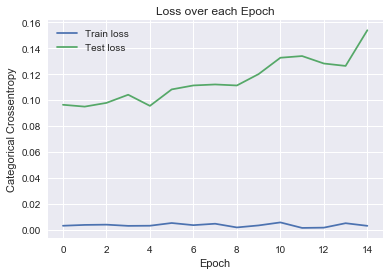

In [205]:
# plot train test losses
plt.title('Loss over each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')

plt.plot(nn.history['loss'], label='Train loss')
plt.plot(nn.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

In [196]:
# index for the largest number from each row gives class prediction
model.predict(X_test_sc).argmax(axis=1)

array([2, 0, 2, ..., 3, 3, 1])

In [197]:
Y_test_classes = np.argmax(Y_test, axis=1)
Y_test_classes

array([2, 0, 2, ..., 3, 3, 1])

In [198]:
nn_preds = model.predict_classes(X_test_sc)

confusion_matrix(Y_test_classes, nn_preds)

array([[288,   1,   0,   1,   2,   2],
       [  1, 128,   0,   0,   0,   0],
       [  1,   0, 144,   1,   0,   0],
       [  0,   4,   1, 153,   1,   1],
       [  0,   2,   0,   0, 140,   0],
       [  0,   0,   0,   0,   0, 146]])

### Neural Network trained on PCA transformed data

In [194]:
# Construct a neural network
model_Z = Sequential()

# input and hidden layers
model_Z.add(Dense(50, activation='relu', input_dim=Z_train_2.shape[1]))
model_Z.add(Dropout(0.5))

# For multiclass, same number of neurons as classes that we are predicting
# softmax activation function
model_Z.add(Dense(6, activation='softmax'))

# compile model
model_Z.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [195]:
nn_Z = model_Z.fit(Z_train_2, Y_train, epochs=15, validation_data=(Z_test_2, Y_test))

Train on 3051 samples, validate on 1017 samples
Epoch 1/15
3051/3051 [==============================] - 0s 150us/step - loss: 1.4117 - acc: 0.4975 - val_loss: 0.5815 - val_acc: 0.9046
Epoch 2/15
3051/3051 [==============================] - 0s 44us/step - loss: 0.5655 - acc: 0.8482 - val_loss: 0.2374 - val_acc: 0.9715
Epoch 3/15
3051/3051 [==============================] - 0s 46us/step - loss: 0.3145 - acc: 0.9269 - val_loss: 0.1235 - val_acc: 0.9813
Epoch 4/15
3051/3051 [==============================] - 0s 48us/step - loss: 0.1970 - acc: 0.9580 - val_loss: 0.0761 - val_acc: 0.9862
Epoch 5/15
3051/3051 [==============================] - 0s 45us/step - loss: 0.1520 - acc: 0.9689 - val_loss: 0.0537 - val_acc: 0.9892
Epoch 6/15
3051/3051 [==============================] - 0s 45us/step - loss: 0.1110 - acc: 0.9774 - val_loss: 0.0436 - val_acc: 0.9902
Epoch 7/15
3051/3051 [==============================] - 0s 48us/step - loss: 0.0981 - acc: 0.9764 - val_loss: 0.0383 - val_acc: 0.9902
Epoch 

In [204]:
pd.DataFrame(nn_Z.history).tail()

,val_loss,val_acc,loss,acc
10,0.027432,0.992134,0.049305,0.990495
11,0.026780,0.992134,0.049192,0.989184
12,0.026137,0.993117,0.044603,0.989512
13,0.025169,0.994100,0.031225,0.993117
14,0.024752,0.993117,0.034213,0.992134


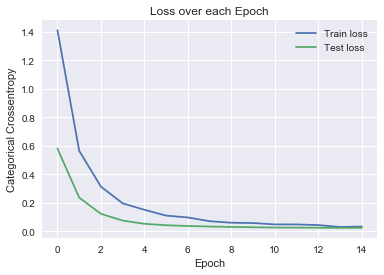

In [206]:
# plot train test losses
plt.title('Loss over each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')

plt.plot(nn_Z.history['loss'], label='Train loss')
plt.plot(nn_Z.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

In [199]:
model_Z.predict(Z_test_2).argmax(axis=1)

array([2, 0, 2, ..., 3, 3, 1])

In [200]:
Y_test_classes_Z = np.argmax(Y_test, axis=1)
Y_test_classes_Z

array([2, 0, 2, ..., 3, 3, 1])

In [201]:
nn_preds_Z = model_Z.predict_classes(Z_test_2)

confusion_matrix(Y_test_classes_Z, nn_preds_Z)

array([[290,   0,   0,   2,   2,   0],
       [  0, 128,   0,   1,   0,   0],
       [  0,   0, 146,   0,   0,   0],
       [  1,   0,   1, 158,   0,   0],
       [  0,   0,   0,   0, 142,   0],
       [  0,   0,   0,   0,   0, 146]])

- The Neural Network with the PCA transformed data seemed to have a decreasing loss function that is characteristic of a Neural Net as opposed to the normal X train scaled data. 
- In both cases, the accuracy achieved by the model on the test data was 99.9% and 99.2% for PCA transformed data and original X train scaled data, respectively.
- Due to the inherent nature of how a Neural Net works, it is not possible to get information on which features seem to have an influence on the classification. 
- However, the confusion matrices show once that the accuracy was superb with very little misclassifications.